In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
completed_orders = pd.read_csv('/home/martin/Desktop/10-Academy/week-8/Causal-Inference/data/nb.csv')
delivery_requests = pd.read_csv('/home/martin/Desktop/10-Academy/week-8/Causal-Inference/data/driver_locations_during_request.csv')

# Inspect the data
print(completed_orders.info())
print(completed_orders.head())

print(delivery_requests.info())
print(delivery_requests.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB
None
   Trip ID                         Trip Origin  \
0   391996  6.508813001668548,3.37740316890347   
1   391997                 6.4316714,3.4555375   
2   391998         6.631679399999999,3.3388976   
3   391999         6.572757200000001,3.3677082   
4   392001                 6.6010417,3.2766339   

                  Trip Destination      Trip Start Time        Trip End Time  
0      6.650969799999999,3.3450307  2021-07-01 07:28:04  2021-07-01 07:29:37  
1  6.4280814653326,3.4721885847586  2021-07-01

In [3]:
# Handling missing values
completed_orders['Trip Start Time'] = pd.to_datetime(completed_orders['Trip Start Time'])
completed_orders['Trip End Time'] = pd.to_datetime(completed_orders['Trip End Time'])

In [4]:
# Drop rows where 'Trip Start Time' or 'Trip End Time' is missing
completed_orders = completed_orders.dropna(subset=['Trip Start Time', 'Trip End Time'])

In [5]:
# Calculate trip duration
completed_orders['Trip Duration'] = (completed_orders['Trip End Time'] - completed_orders['Trip Start Time']).dt.total_seconds() / 60
print()


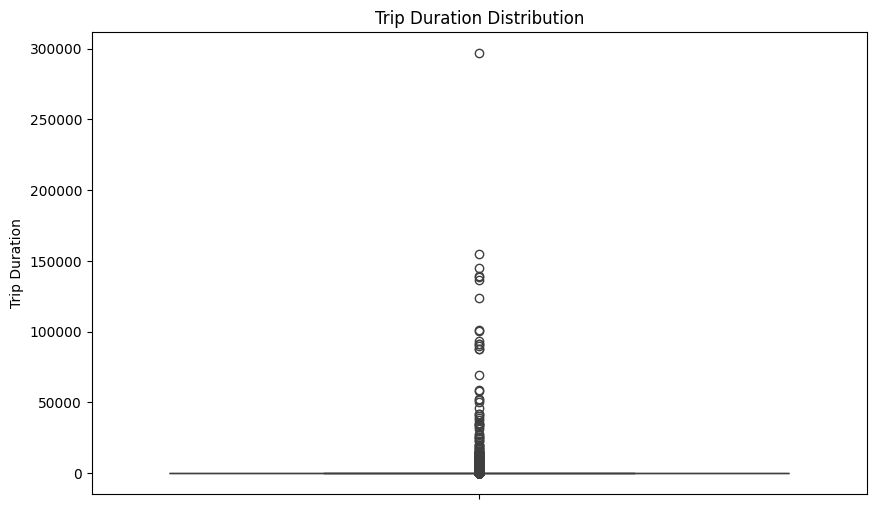

In [6]:
# Plot trip duration to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(completed_orders['Trip Duration'])
plt.title('Trip Duration Distribution')
plt.show()

In [7]:
# Remove outliers (e.g., trips longer than 99th percentile or shorter than 1st percentile)
q_low = completed_orders['Trip Duration'].quantile(0.01)
q_high = completed_orders['Trip Duration'].quantile(0.99)
completed_orders = completed_orders[(completed_orders['Trip Duration'] >= q_low) & (completed_orders['Trip Duration'] <= q_high)]

In [8]:
# Save the cleaned DataFrame to a CSV file
completed_orders.to_csv('cleaned_completed_orders.csv', index=False)

print("DataFrame has been saved to 'cleaned_completed_orders.csv'")


DataFrame has been saved to 'cleaned_completed_orders.csv'


#### DELIVERY_REQUESTS DATASET

In [9]:
# Drop columns with all null values
delivery_requests = delivery_requests.drop(columns=['created_at', 'updated_at'])


In [10]:
# Save the cleaned DataFrame to a CSV file
delivery_requests.to_csv('cleaned_delivery_requests.csv', index=False)

print("DataFrame has been saved to 'cleaned_delivery_requests.csv'")


DataFrame has been saved to 'cleaned_delivery_requests.csv'


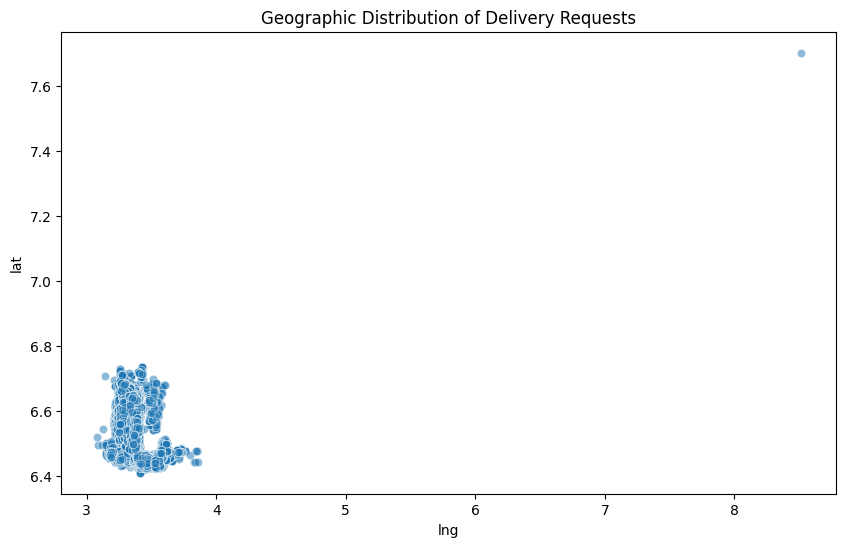

In [11]:
# Plot geographic coordinates to identify outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lng', y='lat', data=delivery_requests, alpha=0.5)
plt.title('Geographic Distribution of Delivery Requests')
plt.show()

# Assuming we have the geographical boundaries of Lagos, we can filter out outliers
# Example: min_lat, max_lat, min_lng, max_lng = 6.2, 6.7, 3.2, 3.6 (dummy values)
min_lat, max_lat = 6.2, 6.7
min_lng, max_lng = 3.2, 3.6
delivery_requests = delivery_requests[(delivery_requests['lat'] >= min_lat) & (delivery_requests['lat'] <= max_lat) &
                                      (delivery_requests['lng'] >= min_lng) & (delivery_requests['lng'] <= max_lng)]
